In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [514]:
data=pd.read_csv("Input\Lionel Messi Goals.csv")
data.head(10)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
5,samedi 18 ao�t 2018,Liga,FC Barcelona,Alav�s,Alav�s,90+2,3,0,Field goal,Left foot,Won
6,samedi 18 ao�t 2018,Liga,FC Barcelona,Alav�s,Alav�s,64,1,0,Free kick,Left foot,Won
7,mercredi 9 mai 2018,Liga,FC Barcelona,Villarreal,Villarreal,45,3,0,Field goal,Left foot,Won
8,samedi 7 avril 2018,Liga,FC Barcelona,Legan�s,Legan�s,32,2,0,Field goal,Left foot,Won
9,samedi 7 avril 2018,Liga,FC Barcelona,Legan�s,Legan�s,27,1,0,Free kick,Left foot,Won


In [515]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


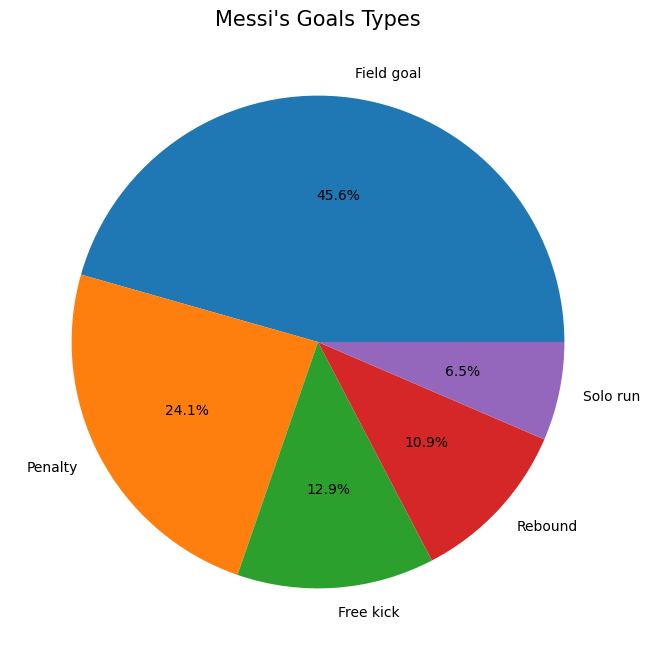

In [516]:
plt.figure(figsize=(10,8))
plt.pie(df["count"], labels=df["Goal Type"], autopct='%1.1f%%')
plt.title("Messi's Goals Types", fontsize=15)
plt.savefig('Output/Messi_Goals_Types.png')
plt.show()

In [517]:
df = data["Goal Method"].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


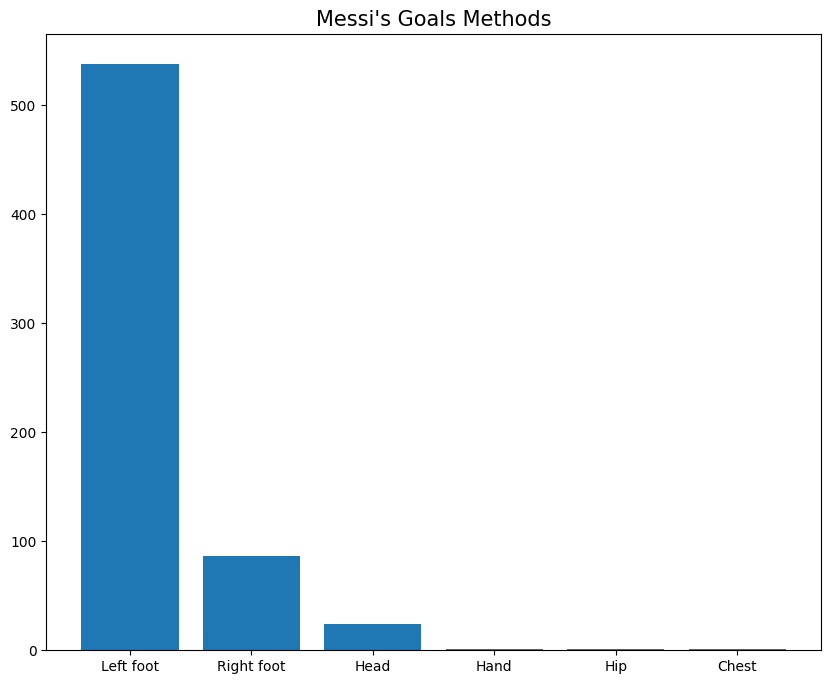

In [518]:
plt.figure(figsize=(10,8))
plt.bar(df["Goal Method"], df["count"])
plt.title("Messi's Goals Methods", fontsize=15)
plt.show()

ستون تاریخ را پیش پردازش کنید و مقدار سال را بدست آورید. سپس تعداد گل های مسی در هر سال را بر روی نمودار نمایش دهید

In [519]:
data['Date']=data['Date'].str[-4:]
df=data.value_counts('Date').reset_index()
df=df.sort_values(by='Date',ascending=True).reset_index()
df.head()


,index,Date,count
0,14,2005,3
1,13,2006,12
2,10,2007,31
3,11,2008,22
4,9,2009,41


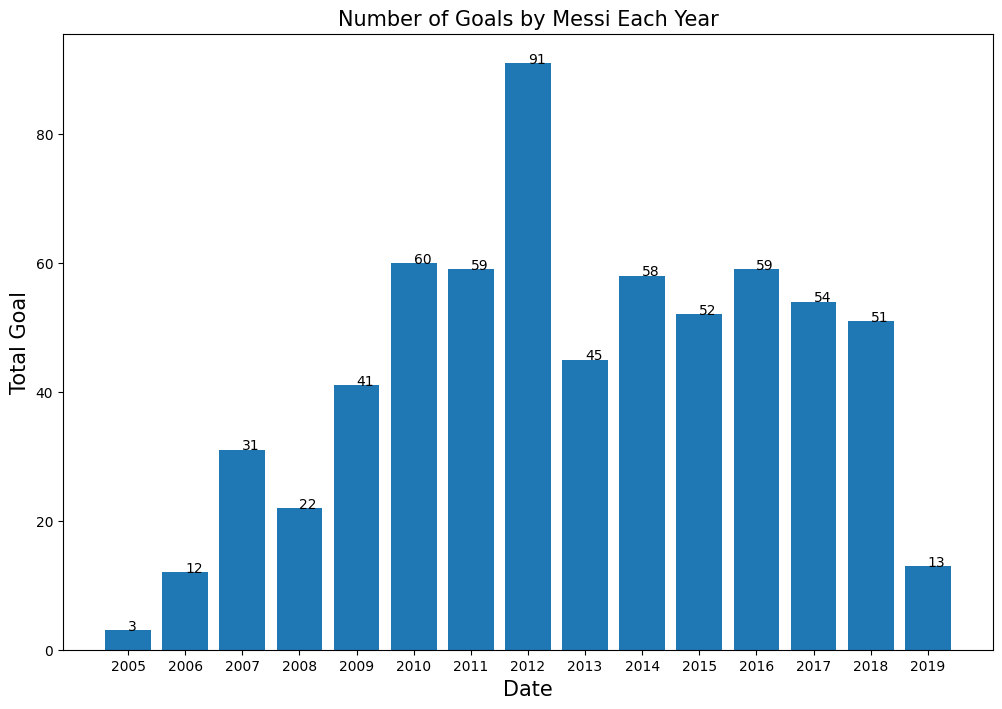

In [520]:
plt.figure(figsize=(12,8))
plt.bar(df['Date'],df['count'])
plt.title('Number of Goals by Messi Each Year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Goal', fontsize=15)
for i in range(len(df)):
    plt.text(i,df['count'][i],df['count'][i])
plt.savefig('Output/Number_of_Goals_by_Messi_Each_Year.png')
plt.show()

مسی اکثر پنالتی ها را با پای چپ زده است یا با پای راست؟ بر روی نمودار نمایش دهید

In [521]:
data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
df=data.query('GoalType=="Penalty"')
df=df['Goal Method'].value_counts().reset_index()
df.loc[1]=['Right foot',0]
df

,Goal Method,count
0,Left foot,82
1,Right foot,0


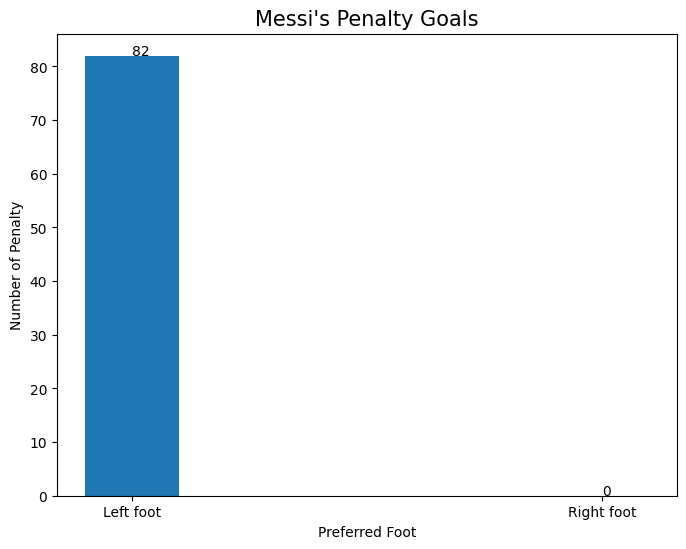

In [522]:

plt.figure(figsize=(8,6))
plt.bar(df['Goal Method'],df['count'],width = 0.2)
for i in range(len(df)):
    plt.text(i,df['count'][i],df['count'][i])
plt.ylabel("Number of Penalty", fontsize=10)
plt.xlabel("Preferred Foot", fontsize=10)
plt.title("Messi's Penalty Goals", fontsize=15)
plt.savefig('Output/Messi_Penalty_Goals.png')
plt.show()

چند درصد بازی هایی که در آن ها مسی در وقت اضافه گل زده است، به پیروزی ختم شده اند؟ 

In [523]:
data["Minute"]=data["Minute"].apply(eval)
data["Minute"]=data["Minute"].astype(int)
df=data.query('Minute>89')
df=df['Final Game Result'].value_counts().reset_index()
df.head()

,Final Game Result,count
0,Won,35
1,Draw,3
2,Lost,2


In [524]:

df2=df.loc[df['Final Game Result'] == 'Won', 'count'].iloc[0]/df['count'].sum()
df['Percent']=df['count']/df['count'].sum()
print(f'percentage of games that messi team won when messis goal is in extra time: {df2}')
df.head()


percentage of games that messi team won when messis goal is in extra time: 0.875


,Final Game Result,count,Percent
0,Won,35,0.875
1,Draw,3,0.075
2,Lost,2,0.050


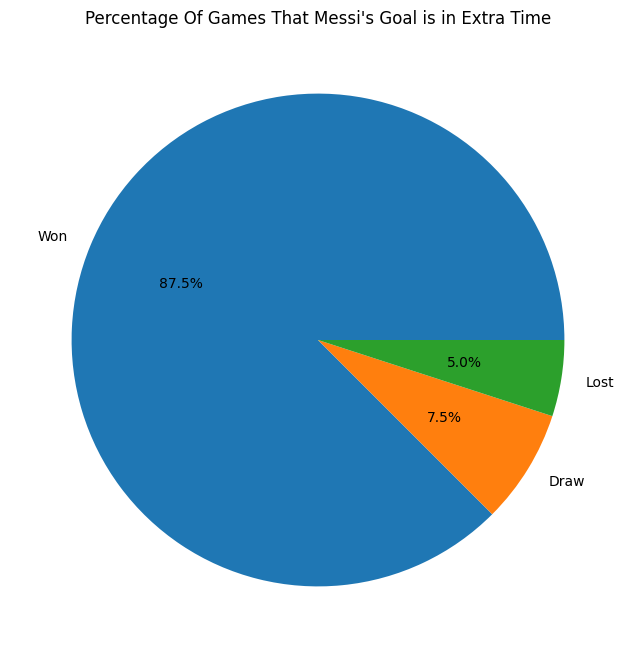

In [525]:
plt.figure(figsize=(10,8))
plt.pie(df['Percent'],labels=df['Final Game Result'],autopct='%1.1f%%')
plt.title("Percentage Of Games That Messi's Goal is in Extra Time")
plt.savefig('Output/Messi_Goals_Extra_Time.png')
plt.show()

چند درصد گل های مسی گل تساوی بوده است؟ 

In [526]:
data.head()
data.rename(columns = {'Home team':'Hometeam','Away team':'Awayteam','Score Away Team - When Messi Scored':'ScoreAwayTeamWhenMessiScored','Score Home Team - When Messi Scored':'ScoreHomeTeamWhenMessiScored'}, inplace = True)
equal_goal=np.where(data.ScoreHomeTeamWhenMessiScored ==  data.ScoreAwayTeamWhenMessiScored )

percent_goal=np.size(equal_goal)/len(data)
percent_goal=round(percent_goal, 3)
print(f'Percent of Equal Goal of Messi: {percent_goal*100}%')


Percent of Equal Goal of Messi: 8.6%
